

"""
### Question:


#### Image Classification using the Celebrity Faces Dataset

You are tasked with designing an image classification architecture and using it to classify images from the Celebrity Faces Dataset, which consists of images belonging to 17 different celebrity classes. Follow the steps below to complete this task:

1. **Design an Image Classification Architecture**:
    - Create a convolutional neural network (CNN) architecture for image classification. The architecture should include:
        - Input layer suitable for the image size of the Celebrity Faces Dataset (images are generally around 474 pixels in one dimension).
        - Convolutional layers, pooling layers, and fully connected layers. Customize the number, type, and order of layers as you see fit.
        - Use suitable activation functions throughout the network.
        - Implement dropout or any other regularization techniques as needed.

2. **Compile the Model**:
    - Select an appropriate loss function and optimizer for multi-class classification.
    - Compile the model using your chosen parameters.

3. **Prepare and Split the Dataset**:
    - Load and preprocess the Celebrity Faces Dataset. Ensure to handle data augmentation if necessary.
    - Resize each image to a uniform size suitable for your model's input layer (e.g., resize images to 224x224 pixels).
    - Split the dataset into training and validation sets.

4. **Train the Model**:
    - Train the model using the training set of the Celebrity Faces Dataset.
    - Monitor the training process and adjust hyperparameters as needed.
    - Validate the model using the validation set.

5. **Evaluate the Model**:
    - Evaluate the performance of your model on the validation set.
    - Provide metrics such as accuracy, precision, recall, and F1-score.

6. **Classify New Images**:
    - During the exam, you will be provided with new images from the Celebrity Faces Dataset. Use your trained model to classify these images.
    - Report the predicted labels for the new images and discuss any challenges faced.

7. **Documentation and Analysis**:
    - Document your entire process, including:
        - Architecture design decisions.
        - Hyperparameter choices.
        - Training and evaluation procedures.
        - Results and analysis of the model's performance.

#### Notes:
- Utilize Python and a deep learning framework of your choice (e.g., TensorFlow, Keras) for implementing the CNN.
- The images in the Celebrity Faces Dataset should be resized to 224x224 pixels for consistency in input size.
- Ensure your code is well-structured and easy to follow, with clear comments where necessary.



Good luck with your preparation!
"""


In [1]:
# Import google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loaded images shape: (1799, 150, 150, 3)
Loaded labels shape: /n Images with Folder name (1799,) /n Images with Folder name


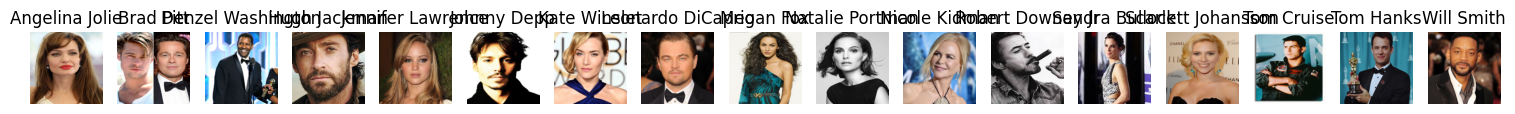

In [2]:

# Code for loading the dataset and plotting, with folder name

# first upload the dataset in google drive
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Set up the directory path where your dataset is located
dataset_directory = '/content/drive/MyDrive/Scifor Technologies/Test 8.0/Practical Question/Celebrity Faces Dataset/'

# Function to load the dataset
def load_dataset(directory):
    images = []
    labels = []
    class_names = sorted(os.listdir(directory))  # Assumes each subdirectory is a class

    for i, class_name in enumerate(class_names):
        class_directory = os.path.join(directory, class_name)
        for filename in os.listdir(class_directory):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                image_path = os.path.join(class_directory, filename)
                image = Image.open(image_path)
                image = image.resize((150, 150))  # Resize if necessary
                image = np.array(image) / 255.0  # Normalize pixel values to [0, 1]
                images.append(image)
                labels.append(i)  # Store index of the class

    images = np.array(images)
    labels = np.array(labels)

    return images, labels, class_names

# Usage example
images, labels, class_names = load_dataset(dataset_directory)

# Print shape of loaded data for verification
print("Loaded images shape:", images.shape)
print("Loaded labels shape: /n Images with Folder name", labels.shape, "/n Images with Folder name")

# Plotting example: Plot one example image from each class
num_classes = len(class_names)
fig, axes = plt.subplots(1, num_classes, figsize=(15, 3))

for i, class_name in enumerate(class_names):
    class_indices = np.where(labels == i)[0]
    example_image = images[class_indices[0]]
    axes[i].imshow(example_image)
    axes[i].set_title(class_name)
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [3]:
from glob import glob  # Importing glob module to handle file path expansion

# Glob all folders in the specified directory
folders = glob(r"/content/drive/MyDrive/Scifor Technologies/Test 8.0/Practical Question/Celebrity Faces Dataset/*")

# Print the number of folders found
print(len(folders))

17


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Image_size = 224
Batch_size = 32
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

In [5]:
train_generator = train_datagen.flow_from_directory(
    dataset_directory,                    # Path to the target directory
    target_size=(Image_size, Image_size),  # Resize images to 224x224 pixels
    batch_size=Batch_size,       # Number of images per batch
    subset='training'            # Use subset 'training' from the directory
)

validation_generator = validation_datagen.flow_from_directory(
    dataset_directory,                    # Path to the target directory
    target_size=(Image_size, Image_size),  # Resize images to 224x224 pixels
    batch_size=Batch_size,       # Number of images per batch
    subset='validation'          # Use subset 'validation' from the directory
)

Found 1620 images belonging to 17 classes.
Found 179 images belonging to 17 classes.


In [6]:
import cv2
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D

from keras import utils

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Initialize the sequential model
model = Sequential()

# Add a 2D convolutional layer with 32 filters, each of size 3x3,
# ReLU activation, glorot uniform kernel initializer, and input shape of (224, 224, 3)
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='glorot_uniform', input_shape=(224, 224, 3)))

# Add a max pooling layer with pool size 2x2
model.add(MaxPooling2D((2, 2)))

# Flatten the 2D arrays into a 1D array for the fully connected layers
model.add(Flatten())

# Add a fully connected layer with 200 neurons, ReLU activation, glorot uniform
model.add(Dense(100, activation='relu', kernel_initializer='glorot_uniform'))

# softmax activation function for multi-class classification
model.add(Dense(17, activation='softmax'))

In [8]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 394272)            0         
                                                                 
 dense (Dense)               (None, 100)               39427300  
                                                                 
 dense_1 (Dense)             (None, 17)                1717      
                                                                 
Total params: 39429913 (150.41 MB)
Trainable params: 39429913 (150.41 MB)
Non-trainable params: 0 (0.00 Byte)
____________

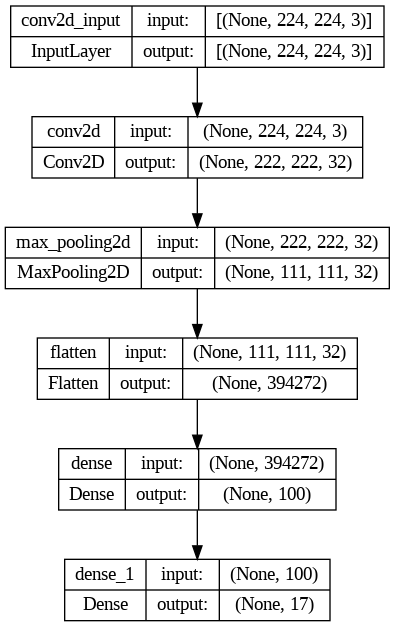

In [9]:
utils.plot_model(model, show_shapes=True)


In [10]:
# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
epoch = 10  # Number of training epochs

history = model.fit(train_generator,            # Training data generator
                    steps_per_epoch=len(train_generator),  # Number of steps (batches) per epoch
                    epochs=epoch,             # Number of epochs to train the model
                    validation_data=validation_generator,  # Validation data generator
                    validation_steps=len(validation_generator)  # Number of validation steps per epoch
                   )

Epoch 1/10
51/51 [==============================] - 119s 2s/step - loss: 9.0450 - accuracy: 0.0667 - val_loss: 2.7944 - val_accuracy: 0.1397
Epoch 2/10
51/51 [==============================] - 114s 2s/step - loss: 2.7795 - accuracy: 0.1309 - val_loss: 2.6823 - val_accuracy: 0.1453
Epoch 3/10
51/51 [==============================] - 116s 2s/step - loss: 2.6616 - accuracy: 0.1648 - val_loss: 2.5900 - val_accuracy: 0.1899
Epoch 4/10
51/51 [==============================] - 120s 2s/step - loss: 2.5346 - accuracy: 0.1907 - val_loss: 2.4145 - val_accuracy: 0.2905
Epoch 5/10
51/51 [==============================] - 118s 2s/step - loss: 2.4217 - accuracy: 0.2315 - val_loss: 2.3437 - val_accuracy: 0.2235
Epoch 6/10
51/51 [==============================] - 118s 2s/step - loss: 2.3237 - accuracy: 0.2741 - val_loss: 2.1645 - val_accuracy: 0.3240
Epoch 7/10
51/51 [==============================] - 114s 2s/step - loss: 2.2180 - accuracy: 0.3019 - val_loss: 2.1432 - val_accuracy: 0.3240
Epoch 8/10
51

In [12]:
model.evaluate(validation_generator)


6/6 [==============================] - 3s 426ms/step - loss: 2.0051 - accuracy: 0.3743


[2.00512957572937, 0.3743016719818115]

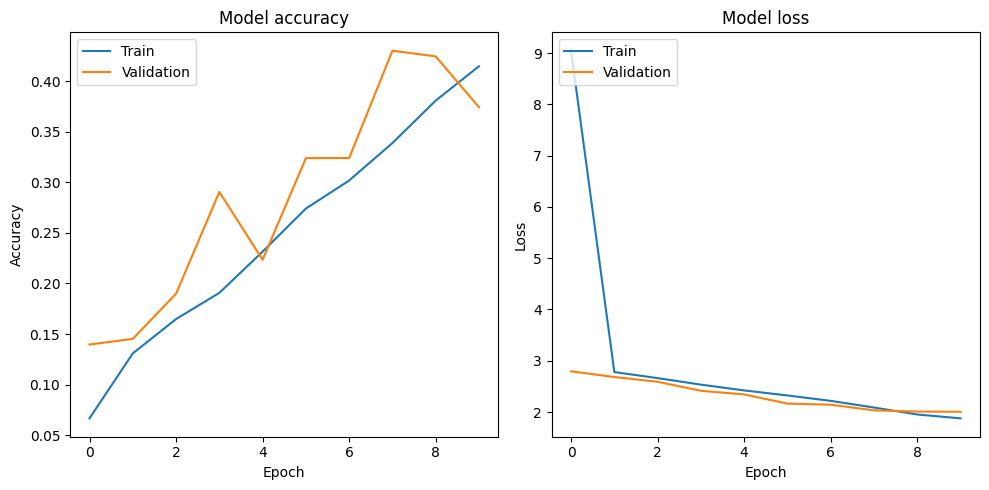

In [13]:

# Plot training history
plt.figure(figsize=(10, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [14]:
model.save('celebrities1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
import keras
model=keras.models.load_model('celebrities1.h5')

In [16]:
celebrity_names = os.listdir(dataset_directory)
print(celebrity_names)

['Angelina Jolie', 'Brad Pitt', 'Denzel Washington', 'Hugh Jackman', 'Jennifer Lawrence', 'Johnny Depp', 'Kate Winslet', 'Leonardo DiCaprio', 'Megan Fox', 'Natalie Portman', 'Nicole Kidman', 'Robert Downey Jr', 'Sandra Bullock', 'Scarlett Johansson', 'Tom Cruise', 'Tom Hanks', 'Will Smith']


1/1 [==============================] - 0s 478ms/step


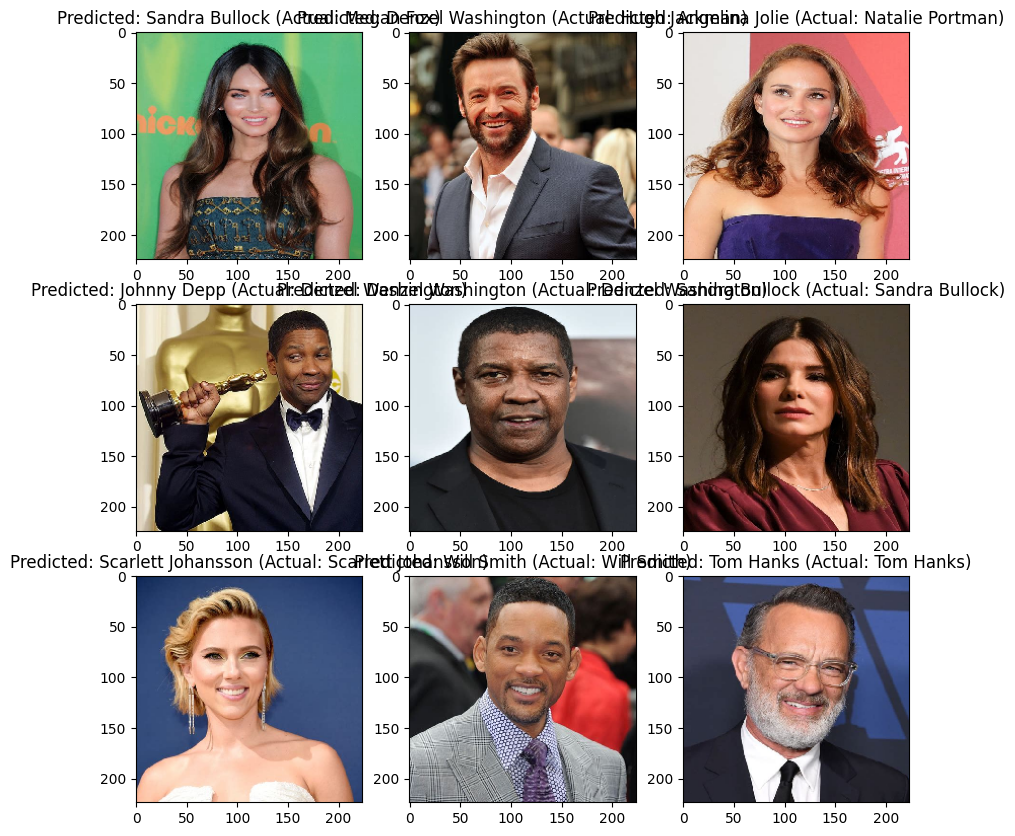

In [17]:
test_images, test_labels = next(validation_generator)
predictions = model.predict(test_images)

# Visualize the predictions
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(test_images[i])
    predicted_idx = np.argmax(predictions[i])
    predicted_name = celebrity_names[predicted_idx]
    actual_idx = np.argmax(test_labels[i])
    actual_name = celebrity_names[actual_idx]
    plt.title(f'Predicted: {predicted_name} (Actual: {actual_name})')
plt.show()

1. What is Mean Average Precision (mAP) in the context of object detection, and how is it calculated?

Mean Average Precision(MAP) is a score of precision it is used to predict and observe performance of the object detection. The higher the value results as better prediction.
     Precision = TP/TP+FP

2. Explain the main differences between RCNN, Fast RCNN, and Faster RCNN.

* RCNN takes 46 secs for prediction, it takes time to produce output
* Fast RCNN  takes 2 sec for prediction
* Faster RCNN takes 0.10 secs for prediction.

3. How does the Region Proposal Network (RPN) in Faster RCNN improve the efficiency of the
detection process?

In RPN there is no input image, Feature maps are input for RPN, in this architecture we have anchor boxes, it predicts the background by itself.

4. Describe the architecture and working principle of the YOLO (You Only Look Once) object
detection algorithm

YOLO - You Only Look Once is one of the best object detection method, the architecture describes the input image go through inception net pre trained by transfer learning and with 5 convolutional layers , 2 fully connected layers with the output layer as 7x7x30. The output has 9 anchor boxes, each grid has 2 bounding boxes and 30 layers, the bounding boxes gives del x, del y, del h, del w, del confidence, and remaining 20 layers are the conditional probability for classes, totally 98 layers, if threshold is higher we keep the value, less than threshold as 0. After this conversion set the layers in descending order and by using non- max suppression, we set higher the threshold set to zero and less than threshold we keep the value this gives exact one bounding box with accurate prediction of object detection by removing the redundant blocks.

5. What are the key improvements introduced in YOLOv2 (YOLO9000) compared to the original
YOLO algorithm?

In YOLO v2 and YOLO 9000 instead of inception net updated to darknet architecture and use batch normalization for predicting the additional features.